<a href="https://colab.research.google.com/github/pdm10/pdm10/blob/main/project/cifar10/cifar10_TL_tf_datasets_EfficientNetB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning
- cifar10 dataset from tensorflow_datasets
- ConvNet: EfficientNetB1

> https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB1

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Load cifar10 using tensorflow_datasets

In [2]:
# CFAR-10 데이터 세트를 적재한다. (tensorflow_datasets)
import tensorflow_datasets as tfds

Batch_size = 64
# 
dataset_name = "cifar10"  # change the name of the dataset 
# PrefetchDataset : BatchDataSet => (None, 32, 32, 3)
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, 
    split=["train", "test"], 
    with_info=True, 
    batch_size=Batch_size,  # preset mini-batch
    as_supervised=True
)

NUM_CLASSES = ds_info.features["label"].num_classes
print(NUM_CLASSES)
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
str(ds_train)  # PrefetchDataset
# PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3)
# Batch preset?

for i, (image, label) in enumerate(ds_train.take(1)):
    print(i, image.shape, label)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteAN4YBM/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteAN4YBM/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
10
0 (64, 32, 32, 3) tf.Tensor(
[7 8 4 4 6 5 2 9 6 6 9 9 3 0 8 7 9 0 4 9 0 8 6 4 2 8 8 7 0 8 4 2 3 7 0 5 4
 3 8 1 5 9 4 9 8 6 9 7 7 7 3 6 3 8 3 6 1 1 7 0 9 0 0 4], shape=(64,), dtype=int64)


In [3]:
# Show samples
# _ = tfds.show_examples(ds_train, ds_info)
IMG_SIZE = 128
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

print(len(ds_train),len(ds_test))

str(ds_train)  # MapDataset
for i, (image, label) in enumerate(ds_train.take(1)):
    print(i, image.shape, label)


782 157
0 (64, 128, 128, 3) tf.Tensor(
[7 8 4 4 6 5 2 9 6 6 9 9 3 0 8 7 9 0 4 9 0 8 6 4 2 8 8 7 0 8 4 2 3 7 0 5 4
 3 8 1 5 9 4 9 8 6 9 7 7 7 3 6 3 8 3 6 1 1 7 0 9 0 0 4], shape=(64,), dtype=int64)


In [7]:
50000/64, 10000/64

(781.25, 156.25)

In [8]:
str(ds_train)

'<MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>'

========================= Train dataset =========================
(64, 128, 128, 3)


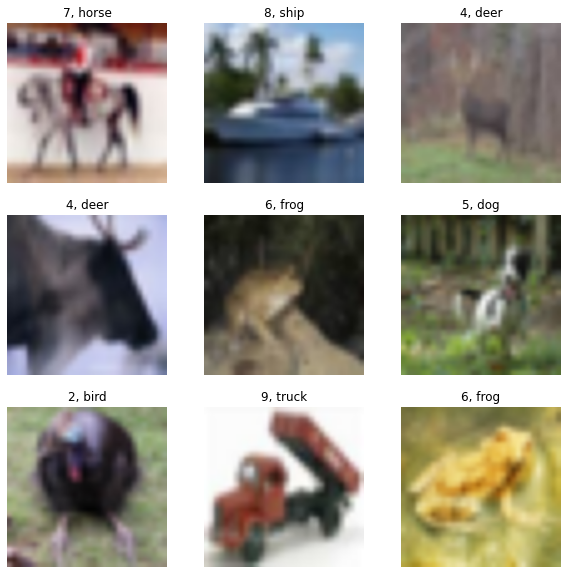

========================= Test dataset =========================


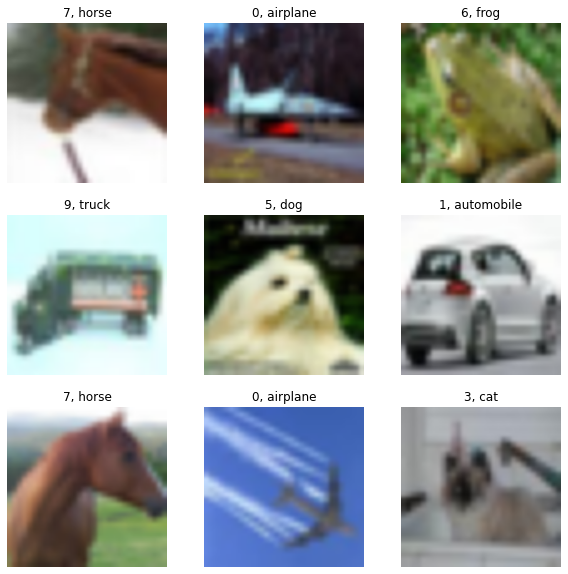

In [4]:
#
# Visualizing the dataset
#
# The following code shows the first 9 images with their labels.

print("="*25, 'Train dataset', "="*25)
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
# 배치 하나를 가져옵니다.
for images, labels in ds_train.take(1):    # Make a batch of images & labels
    print(images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # tensor2numpy array: tensor.numpy()
        # plt.title(label_names[int(labels[i])])
        plt.title(str(labels[i].numpy()) + ", " + label_names[int(labels[i])])
        plt.axis("off")
plt.show()

print("="*25, 'Test dataset', "="*25)

plt.figure(figsize=(10, 10))
for images, labels in ds_test.take(1):    # Make a batch of images & labels
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(label_names[int(labels[i])])
        plt.title(str(labels[i].numpy()) + ", " + label_names[int(labels[i])])
        plt.axis("off")
plt.show()


## Data augmentation

tf.Tensor(
[7 8 4 4 6 5 2 9 6 6 9 9 3 0 8 7 9 0 4 9 0 8 6 4 2 8 8 7 0 8 4 2 3 7 0 5 4
 3 8 1 5 9 4 9 8 6 9 7 7 7 3 6 3 8 3 6 1 1 7 0 9 0 0 4], shape=(64,), dtype=int64) (64, 128, 128, 3)
(1, 136, 130, 3)
(1, 132, 138, 3)
(1, 130, 126, 3)
(1, 136, 121, 3)
(1, 132, 120, 3)
(1, 116, 119, 3)
(1, 138, 138, 3)
(1, 138, 130, 3)
(1, 131, 132, 3)


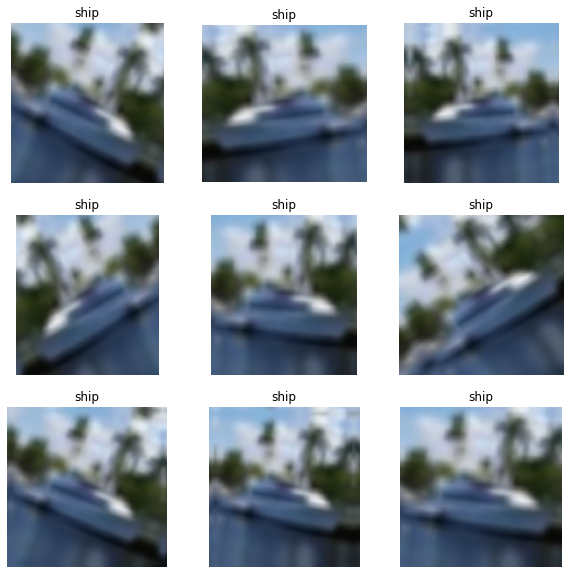

tf.Tensor(
[7 0 6 9 5 1 7 0 3 2 7 2 7 9 6 8 8 8 7 9 4 2 3 5 0 0 2 8 1 8 2 0 7 2 0 0 9
 1 0 5 1 5 0 3 5 0 2 0 5 3 7 4 1 4 2 5 1 5 2 0 7 2 2 1], shape=(64,), dtype=int64) (64, 128, 128, 3)
(1, 134, 128, 3)
(1, 131, 123, 3)
(1, 123, 135, 3)
(1, 125, 129, 3)
(1, 120, 138, 3)
(1, 133, 117, 3)
(1, 119, 124, 3)
(1, 123, 134, 3)
(1, 119, 127, 3)


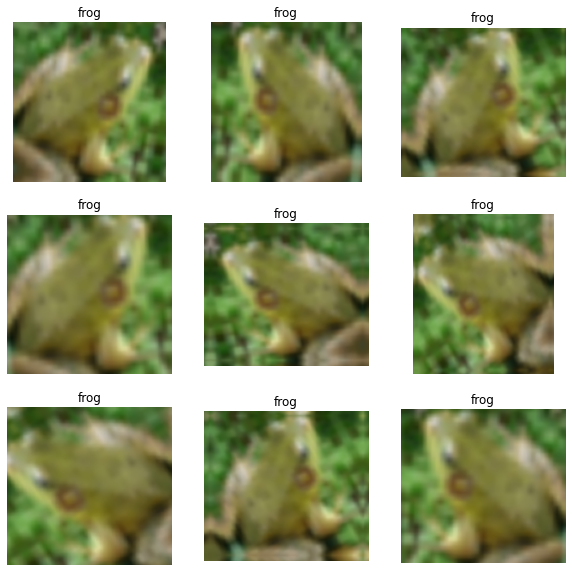

In [6]:
#
# Data augmentation
#
from tensorflow.keras import layers
tf.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(factor=0.1),
  layers.RandomZoom(0.1),
  # layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
  layers.RandomHeight(0.1),
  layers.RandomWidth(0.1),
  # layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

# Plot the augmented images
plt.figure(figsize=(10,10))
image_idx = np.random.randint(10)   # 0~ 9
for images, labels in ds_train.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tf.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(label_names[labels[image_idx]]))
        plt.axis("off")
    break
plt.show()

plt.figure(figsize=(10,10))
image_idx = np.random.randint(10)   # 0~ 9
for images, labels in ds_test.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tf.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title("{}".format(label_names[labels[image_idx]]))
        plt.axis("off")
    break
plt.show()


## Transfer learning
- EfficientNetB1

In [9]:
#
# Transfer learning
#
## Using the model EfficientNetB1 for the first experiment with all the layers trainable 
## Creating the model 

base_model = tf.keras.applications.EfficientNetB1(include_top = False)
base_model.trainable = True 

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.trainable, end=", ")
  

model = tf.keras.Sequential([
  layers.Input(shape=(128,128,3),name='input_layer'),
  # layers.Rescaling(1./255),
  data_augmentation,
  # ConvNet
  base_model,
  layers.GlobalMaxPooling2D(name = "global_max"),
  # FCN
  layers.Dense(128,activation='relu'),
  layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


model.summary()


27018416/27018416 [==============================] - 0s 0us/step
0 True, 1 True, 2 True, 3 True, 4 True, 5 True, 6 True, 7 True, 8 True, 9 True, 10 True, 11 True, 12 True, 13 True, 14 True, 15 True, 16 True, 17 True, 18 True, 19 True, 20 True, 21 True, 22 True, 23 True, 24 True, 25 True, 26 True, 27 True, 28 True, 29 True, 30 True, 31 True, 32 True, 33 True, 34 True, 35 True, 36 True, 37 True, 38 True, 39 True, 40 True, 41 True, 42 True, 43 True, 44 True, 45 True, 46 True, 47 True, 48 True, 49 True, 50 True, 51 True, 52 True, 53 True, 54 True, 55 True, 56 True, 57 True, 58 True, 59 True, 60 True, 61 True, 62 True, 63 True, 64 True, 65 True, 66 True, 67 True, 68 True, 69 True, 70 True, 71 True, 72 True, 73 True, 74 True, 75 True, 76 True, 77 True, 78 True, 79 True, 80 True, 81 True, 82 True, 83 True, 84 True, 85 True, 86 True, 87 True, 88 True, 89 True, 90 True, 91 True, 92 True, 93 True, 94 True, 95 True, 96 True, 97 True, 98 True, 99 True, 100 True, 101 True, 102 True, 103 True, 104 T

In [13]:
# Check the input and output of base_model
ix=layers.Input(shape=(128,128,3))
print(base_model(ix))

KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 1280), dtype=tf.float32, name=None), name='efficientnetb1/top_activation/IdentityN:0', description="created by layer 'efficientnetb1'")


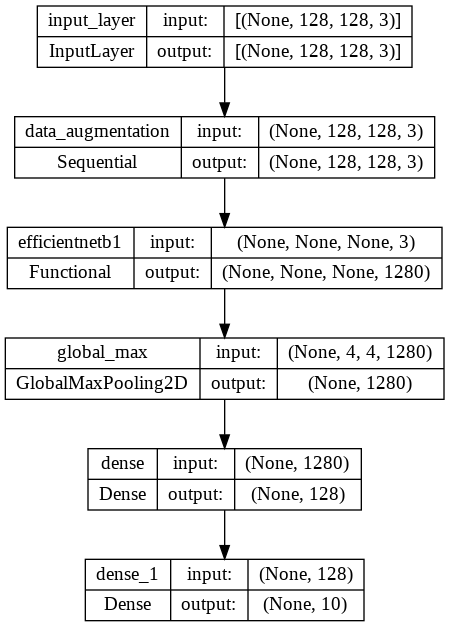

In [12]:
keras.utils.plot_model(model, show_shapes=True)

## Building the Model

In [11]:
# Building the Model
# Inspecting the train_data
ds_train
# Setting up the callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 5 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=3,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

## Check the summary
for no, layer in enumerate(model.layers):
  print(no, layer.trainable)



0 True
1 True
2 True
3 True
4 True


##  Training model using augmentated dataset

In [ ]:
#
######################################################
# Training model using augmentated data
######################################################
#
%%time
history = model.fit(ds_train, 
                    epochs=100, 
                    steps_per_epoch = len(ds_train), 
                    validation_data = ds_test,
                    validation_steps = len(ds_test), # batchSize,
                    callbacks = [early_stopping, reduce_lr])

#
model.evaluate(ds_test)
# loss: 0.1658 - accuracy: 0.9595



Epoch 1/100
782/782 [==============================] - 366s 438ms/step - loss: 0.9147 - accuracy: 0.6997 - val_loss: 0.3603 - val_accuracy: 0.8838 - lr: 1.0000e-04
Epoch 2/100
782/782 [==============================] - 266s 341ms/step - loss: 0.3756 - accuracy: 0.8748 - val_loss: 0.2474 - val_accuracy: 0.9190 - lr: 1.0000e-04
Epoch 3/100
782/782 [==============================] - 262s 335ms/step - loss: 0.2608 - accuracy: 0.9109 - val_loss: 0.2018 - val_accuracy: 0.9345 - lr: 1.0000e-04
Epoch 4/100
782/782 [==============================] - 260s 332ms/step - loss: 0.1993 - accuracy: 0.9317 - val_loss: 0.1781 - val_accuracy: 0.9425 - lr: 1.0000e-04
Epoch 5/100
782/782 [==============================] - 259s 331ms/step - loss: 0.1579 - accuracy: 0.9466 - val_loss: 0.1664 - val_accuracy: 0.9472 - lr: 1.0000e-04
Epoch 6/100
782/782 [==============================] - 256s 328ms/step - loss: 0.1275 - accuracy: 0.9559 - val_loss: 0.1617 - val_accuracy: 0.9535 - lr: 1.0000e-04
Epoch 7/100
782/

[0.16453315317630768, 0.9635000228881836]

## Plot of learning curves
- loss, val_loss
- accuracy, val_accuracy

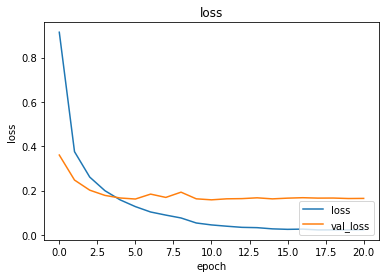

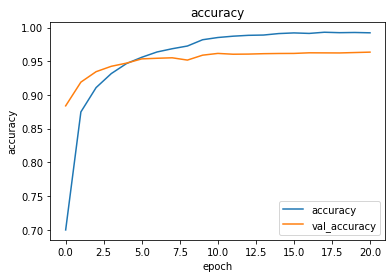

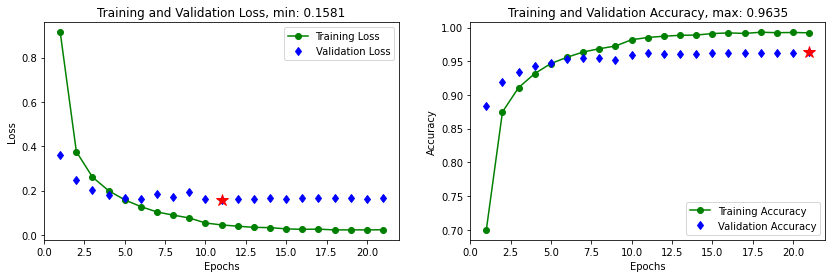

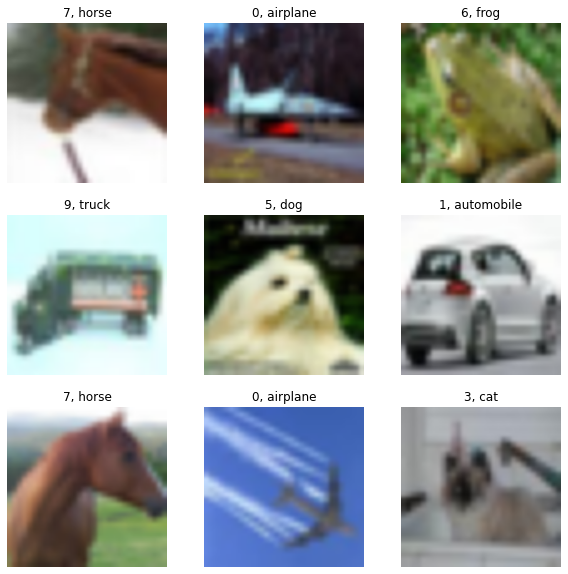

In [ ]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

# 정확도를 그래프로 그린다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
# import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
for images, labels in ds_test.take(1):  # Make a batch of images & labels
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()) + ", " + label_names[int(labels[i])])
        plt.axis("off")
plt.show()



## Evaluation using test dataset

In [ ]:
y_pred0 = model.predict(ds_test)
y_pred = np.argmax(y_pred0, axis=1)
y_test = [labels.numpy() for _, labels in ds_test.unbatch()]
print("정답=", y_test[0])
print("예측값=", y_pred[0], np.argmax(y_pred0[0]))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 0.9595

#################################
# Evaluate the model
#################################
model.evaluate(ds_test)  #,y_test)
# loss: 1.1689 - accuracy: 0.6468
# loss: 0.9207 - accuracy: 0.6799    # with dropout: 0.5
# loss: 0.1658 - accuracy: 0.9595    # Transfer learning using EfficientNetB1


157/157 [==============================] - 10s 54ms/step
정답= 7
예측값= 7 7
157/157 [==============================] - 9s 60ms/step - loss: 0.1645 - accuracy: 0.9635


[0.16453315317630768, 0.9635000228881836]